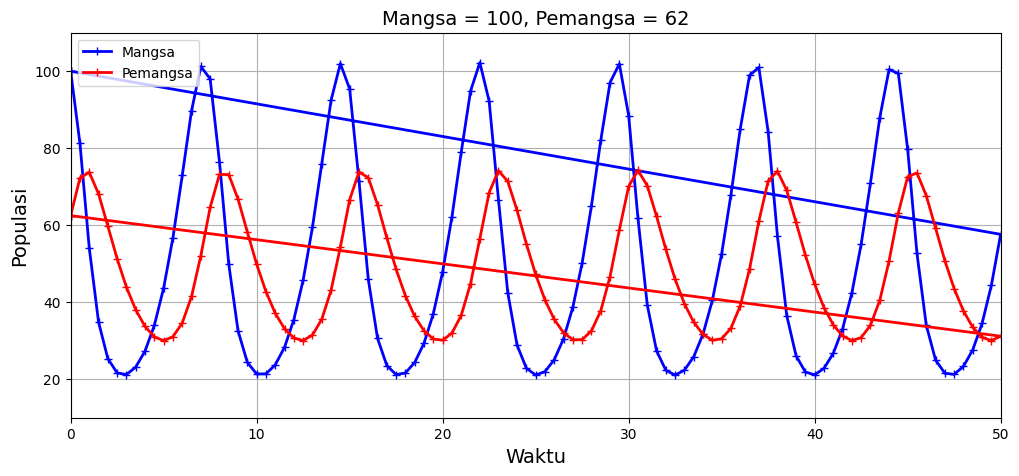

In [1]:
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# x = jumlah mangsa
# y = jumlah pemangsa
# ax = laju kelahiran mangsa
# ay = laju kelahirang pemangsa
# c = laju kematian pemangsa

def mx(x, y, ax, ay):
  return ax*x - ay*x*y
def my(x, y, c, L):
  return -c*y + L*x*y

# kondisi awal
ax = 1.5
ay = 0.03
c = 0.5
L = 0.01
x = 100
y = 50
t = 0
dt = 0.5

# list
xx = []
yy = []
tt = []
while t <= 50:
  x = x + mx(x, y, ax, ay)*dt
  y = y + my(x, y, c, L)*dt
  xx.append(x)
  yy.append(y)
  tt.append(t)
  t += dt

# atur dpi sesuai kebutuhan
# dpi besar = kualitas gambar bagus
fig = plt.figure(figsize=(12,5), dpi=100)
ax = fig.add_subplot(111)
ax.grid(True)
ax.set_xlim(0, 50)
ax.set_ylim(10, 110)
ax.set_ylabel("Populasi", fontsize=14)
ax.set_xlabel("Waktu", fontsize=14)
txt_title = ax.set_title('', fontsize=14)
line1, = ax.plot([], [], 'b+-', lw=2)
line2, = ax.plot([], [], 'r+-', lw=2)

ax.legend(["Mangsa", "Pemangsa"]);

waktu = []
mangsa = []
pemangsa = []

def animate(i):
  waktu.append(tt[i])
  mangsa.append((xx[i]))
  pemangsa.append((yy[i]))
  line1.set_data(waktu, mangsa)
  line2.set_data(waktu, pemangsa)
  txt_title.set_text("Mangsa = {0:0.0f}, Pemangsa = {1:0.0f}".format(xx[i], yy[i]))
  return (line1,line2)

ani = FuncAnimation(fig=fig, frames=len(tt), func=animate, interval=300)
from IPython.display import HTML
HTML(ani.to_html5_video())